In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Task 1 - Data Loading and Initial Exploration:

In [4]:
# Load the dataset using pandas
aviation_df = pd.read_csv('AviationData.csv')
states_df = pd.read_csv('USState_Codes.csv')

In [5]:
# Display the first few rows to understand its structure
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Display the first few rows to understand its structure
states_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
# Generate a summary of the dataset using .info() and .describe() methods.
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
Event.Id                  88889 non-null object
Investigation.Type        88889 non-null object
Accident.Number           88889 non-null object
Event.Date                88889 non-null object
Location                  88837 non-null object
Country                   88663 non-null object
Latitude                  34382 non-null object
Longitude                 34373 non-null object
Airport.Code              50249 non-null object
Airport.Name              52790 non-null object
Injury.Severity           87889 non-null object
Aircraft.damage           85695 non-null object
Aircraft.Category         32287 non-null object
Registration.Number       87572 non-null object
Make                      88826 non-null object
Model                     88797 non-null object
Amateur.Built             88787 non-null object
Number.of.Engines         82805 non-null float64
Engine.Type               

In [8]:
# Generate a summary of the dataset using .info() and .describe() methods.
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# Generate a summary of the dataset using .info() and .describe() methods.
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
US_State        62 non-null object
Abbreviation    62 non-null object
dtypes: object(2)
memory usage: 1.0+ KB


In [10]:
# Generate a summary of the dataset using .info() and .describe() methods.
states_df.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,Maine,SD
freq,1,1


In [11]:
# Task 2 - Data Cleaning

In [12]:
# Identify columns with missing values.

# Below is the list of columns in the aviation data having missing values
aviation_df.columns[aviation_df.isna().sum()>0].to_list()

['Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [13]:
# Identify columns with missing values.


# Below is the list of columns in the states data having missing values i.e 0
states_df.columns[states_df.isna().sum()>0]

Index([], dtype='object')

In [14]:
# Discuss the percentage of missing values.

# Performing only on Aviation data as States data do not have null values
null_values = aviation_df.isna().sum().sum()
total_values = aviation_df.size

missing_percentage = (float(null_values) / float(total_values)) * 100
missing_percentage

20.494643736534037

In [15]:
# Numeric Columns: Impute with mean/median or remove rows.
aviation_df['Total.Fatal.Injuries'].fillna(aviation_df['Total.Fatal.Injuries'].mode()[0], inplace=True)
aviation_df['Total.Serious.Injuries'].fillna(aviation_df['Total.Serious.Injuries'].mode()[0], inplace=True)
aviation_df['Total.Minor.Injuries'].fillna(aviation_df['Total.Minor.Injuries'].mode()[0], inplace=True)
aviation_df['Total.Uninjured'].fillna(aviation_df['Total.Uninjured'].mode()[0], inplace=True)
aviation_df['Number.of.Engines'].fillna(aviation_df['Total.Uninjured'].mode()[0], inplace=True)


In [16]:
# Use pandas functions to clean the data.
aviation_df['Location'].bfill(inplace=True)
aviation_df['Country'].bfill(inplace=True)
aviation_df['Airport.Code'].bfill(inplace=True)
aviation_df['Airport.Name'].bfill(inplace=True)
aviation_df['Injury.Severity'].bfill(inplace=True)
aviation_df['Aircraft.damage'].bfill(inplace=True)
aviation_df['Aircraft.Category'].bfill(inplace=True)
aviation_df['Registration.Number'].ffill(inplace=True)
aviation_df['Make'].ffill(inplace=True)
aviation_df['Engine.Type'].ffill(inplace=True)
aviation_df['Latitude'].bfill(inplace=True)
aviation_df['Longitude'].bfill(inplace=True)
aviation_df['Location'].bfill(inplace=True)
aviation_df['Model'].bfill(inplace=True)
aviation_df['Amateur.Built'].bfill(inplace=True)
aviation_df['Engine.Type'].bfill(inplace=True)
aviation_df['FAR.Description'].bfill(inplace=True)
aviation_df['Schedule'].bfill(inplace=True)
aviation_df['Purpose.of.flight'].ffill(inplace=True)
aviation_df['Air.carrier'].bfill(inplace=True)
aviation_df['Weather.Condition'].ffill(inplace=True)
aviation_df['Broad.phase.of.flight'].ffill(inplace=True)
aviation_df['Report.Status'].ffill(inplace=True)
aviation_df['Publication.Date'].bfill(inplace=True)
aviation_df.dropna(how='any',inplace=True)

In [17]:
# Check for inconsistencies in data types (e.g., dates stored as strings)
# Convert data types to appropriate formats

aviation_df['Event.Date'] = aviation_df['Event.Date'].apply(lambda x: datetime.strptime(x, "%Y-%M-%d"))
aviation_df['Publication.Date'] = aviation_df['Publication.Date'].apply(lambda x: datetime.strptime(x, "%d-%M-%Y"))

In [18]:
# Task 3 - Data Preprocessing

In [19]:
# Identify outliers using statistical methods (e.g., Z-score, IQR) for Uninjured People

percentile_data = aviation_df.describe(percentiles = [.25, .50, .75]).iloc[4:7]
Q1 = percentile_data['Total.Uninjured'][0]
Q3 = percentile_data['Total.Uninjured'][2]
IQR = Q3-Q1
outlier_1 = Q1-(1.5*(IQR))
outlier_2 = Q3-(1.5*(IQR))

percentile_data

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
25%,1.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0,1.0
75%,1.0,0.0,0.0,0.0,2.0


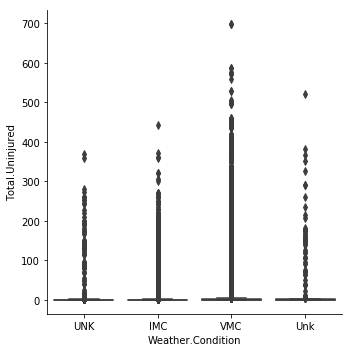

In [20]:
# Visualize outliers using boxplots.

sns.catplot(x='Weather.Condition', y = 'Total.Uninjured', kind = 'box', data = aviation_df)

In [21]:
# Create new features from existing data

aviation_df['year'] = aviation_df['Event.Date'].apply(lambda x: x.year)

In [22]:
# Task 4 -  Exploratory Data Analysis (EDA) and Visualization:

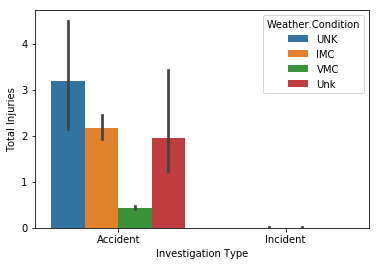

In [23]:
# Q1: What weather conditions (e.g., fog, rain, snow) are most commonly associated with accidents or incidents?
#    Visualize the distribution of weather conditions during accidents using bar plots.
# Ans: As from below analysis, we can see that the happening of incident is very less as compared to accidents and
#      mostly accidents are occuring when the weather condition is of type UNK followed by IMC and Unk and at least
#      accidents with VMC.

sns.barplot(x = 'Investigation.Type', y = 'Total.Fatal.Injuries', data = aviation_df, hue = 'Weather.Condition')
plt.xlabel("Investigation Type")
plt.ylabel("Total Injuries")
plt.show()

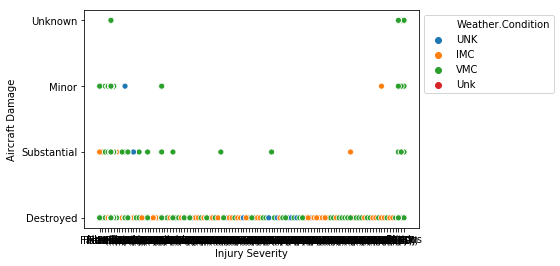

In [24]:
# Q2: Is there a correlation between severe weather conditions and the severity of injuries or aircraft damage? 
#     Use scatter plots or heatmaps to show correlations.

# Ans: As from below analysis, we can see that the VMC weather condition is causing highly Aircraft damage i.e.
#      its getting the aircraft completely destroyed and causing highly fatal injuries

sns.scatterplot(x = 'Injury.Severity', y = 'Aircraft.damage', data = aviation_df, hue = 'Weather.Condition')
plt.xlabel("Injury Severity")
plt.ylabel("Aircraft Damage")
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
plt.show()

In [56]:
# Q3: Are certain airports associated with a higher frequency of accidents? If so, what are the common factors (e.g., runway length, location)? 
#    Analyze and visualize the frequency of accidents by airport.

# Ans: 

filtered_data = aviation_df.groupby('Airport.Name').agg({'Total.Fatal.Injuries' : 'sum'}).reset_index()
sns.barplot(x = 'Airport.Name', y = 'Total.Fatal.Injuries', data = filtered_data)
plt.show()

In [1]:
# Q4: Which aircraft models have the highest rate of accidents or incidents? 
#    Create bar plots or pie charts to visualize accident rates by aircraft model.

# Ans:  

sns.barplot(x='Model', y = 'Total.Fatal.Injuries', data = aviation_df)

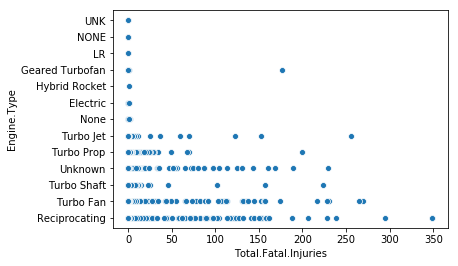

In [29]:
# Q5: Is there a particular engine type that is more frequently involved in accidents?
#     Analyze and visualize accident frequency by engine type.

# Ans: As we can see from below data that the Reciprocating engine type has highest accidents around 0-170 followed
#      by Turbo Fan and least with UNK.

sns.scatterplot(x = 'Total.Fatal.Injuries', y = 'Engine.Type', data = aviation_df)

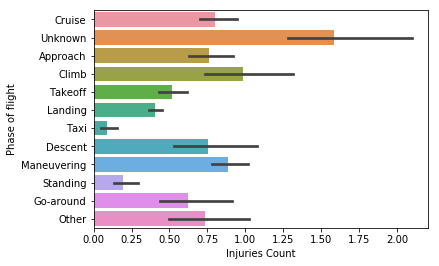

In [35]:
# Q6: During which phase of flight (e.g., takeoff, cruise, landing) do most accidents occur, and 
#     what are the common causes during these phases? Create visualizations such as bar plots to show 
#    accidents by flight phase.

# Ans As we can see the most accident are occuring when flight is in unknown phase, after that while climbing the
#     chances of accidents are high, followed by maneuvering, after that cruising and moving on to last we have the
#     taxi phase where least injuring are occuring i.e. nearby 0


sns.barplot(x='Total.Fatal.Injuries', y = 'Broad.phase.of.flight', data = aviation_df)
plt.xlabel('Injuries Count')
plt.ylabel('Phase of flight')
plt.show()

In [55]:
# Q7: How does the broad phase of flight impact injury severity or aircraft damage? 
#     Use boxplots or violin plots to show injury severity across flight phases.

# Ans

sns.catplot(x='Broad.phase.of.flight', y = 'Injury.Severity', kind = 'violin', data = aviation_df)

,Broad.phase.of.flight,Injury.Severity,Aircraft.damage
0,Cruise,Fatal(2),Destroyed
1,Unknown,Fatal(4),Destroyed
2,Cruise,Fatal(3),Destroyed
3,Cruise,Fatal(2),Destroyed
4,Approach,Fatal(1),Destroyed
5,Climb,Non-Fatal,Substantial
6,Unknown,Fatal(4),Destroyed
7,Takeoff,Non-Fatal,Substantial
8,Landing,Non-Fatal,Substantial
9,Cruise,Non-Fatal,Substantial
